# Bitcoin Prediction Model

In [266]:
#importing packages 
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

In [267]:
#importing the data
coin_data = pd.read_csv('coindesk-bpi-USD-close_data-2010-07-17_2017-11-25.csv')
bitcoin = pd.read_csv('bitcoin_price.csv')
ethereum = pd.read_csv('ethereum_price.csv')
nem = pd.read_csv('nem_price.csv')
iota = pd.read_csv('iota_price.csv')
litecoin = pd.read_csv('litecoin_price.csv')
monero = pd.read_csv('monero_price.csv')
neo = pd.read_csv('neo_price.csv')
numeraire = pd.read_csv('numeraire_price.csv')
omisego = pd.read_csv('omisego_price.csv')
qtum = pd.read_csv('qtum_price.csv')
bitcoin_cash = pd.read_csv('bitcoin_cash_price.csv')
bitconnect = pd.read_csv('bitconnect_price.csv')
dash = pd.read_csv('dash_price.csv')
ripple = pd.read_csv('ripple_price.csv')
waves = pd.read_csv('waves_price.csv')
stratis = pd.read_csv('stratis_price.csv')
nasdaq = pd.read_csv('NASDAQ_1971-2017.csv')
snp = pd.read_csv('S_P500_1950-2017.csv')
dj = pd.read_csv('DowJones_1985-2017.csv')
google_trends= pd.read_excel('Google-Trends-Data.xlsx')
coin_data.head()

,Date,Close Price
0,2010-07-18 00:00:00,0.09
1,2010-07-19 00:00:00,0.08
2,2010-07-20 00:00:00,0.07
3,2010-07-21 00:00:00,0.08
4,2010-07-22 00:00:00,0.05


In [268]:
coin_data.shape

(2691, 2)

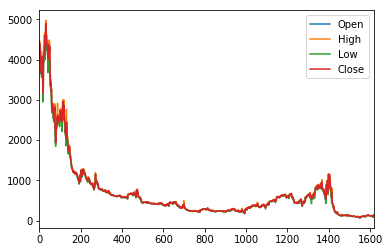

In [269]:
bitcoin.plot()

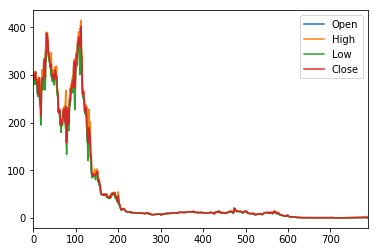

In [270]:
ethereum.plot()

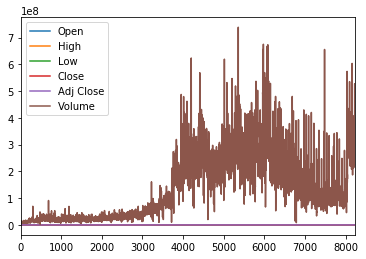

In [271]:
dj.plot()

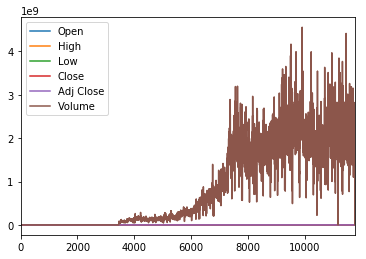

In [272]:
nasdaq.plot()

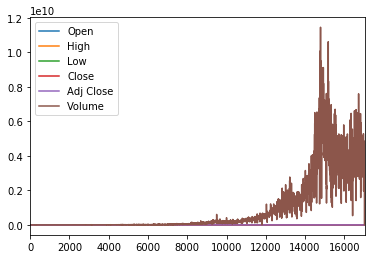

In [273]:
snp.plot()

In [274]:
bitcoin.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [275]:
ethereum.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [276]:
snp.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [277]:
dj.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [278]:
nasdaq.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [279]:
bitcoin

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",4408.46,4432.47,4258.89,4317.48,"1,288,020,000","73,181,300,000"
1,"Oct 02, 2017",4395.81,4470.23,4377.46,4409.32,"1,431,730,000","72,963,200,000"
2,"Oct 01, 2017",4341.05,4403.74,4269.81,4403.74,"1,208,210,000","72,047,300,000"
3,"Sep 30, 2017",4166.11,4358.43,4160.86,4338.71,"1,207,450,000","69,136,600,000"
4,"Sep 29, 2017",4171.62,4214.63,4039.29,4163.07,"1,367,050,000","69,219,200,000"
5,"Sep 28, 2017",4197.13,4279.31,4109.70,4174.73,"1,712,320,000","69,633,200,000"
6,"Sep 27, 2017",3892.94,4210.05,3884.82,4200.67,"1,686,880,000","64,579,200,000"
7,"Sep 26, 2017",3928.41,3969.89,3869.90,3892.35,"1,043,740,000","65,161,000,000"
8,"Sep 25, 2017",3681.58,3950.25,3681.58,3926.07,"1,374,210,000","61,061,100,000"
9,"Sep 24, 2017",3796.15,3796.15,3666.90,3682.84,"768,015,000","62,954,300,000"


In [280]:
ethereum

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",297.480000,300.110000,288.130000,292.460000,"321,680,000","28,238,500,000"
1,"Oct 02, 2017",302.480000,302.920000,294.580000,297.480000,"339,443,000","28,708,500,000"
2,"Oct 01, 2017",301.550000,303.190000,295.060000,302.340000,"306,185,000","28,615,200,000"
3,"Sep 30, 2017",291.480000,303.960000,291.110000,301.460000,"332,439,000","27,655,200,000"
4,"Sep 29, 2017",299.120000,299.920000,279.770000,291.470000,"541,375,000","28,375,900,000"
5,"Sep 28, 2017",306.470000,307.200000,295.470000,299.150000,"501,894,000","29,068,700,000"
6,"Sep 27, 2017",287.020000,308.010000,286.820000,306.470000,"550,244,000","27,219,400,000"
7,"Sep 26, 2017",292.350000,293.750000,287.020000,287.440000,"345,801,000","27,720,000,000"
8,"Sep 25, 2017",282.220000,293.510000,281.880000,292.330000,"483,161,000","26,755,500,000"
9,"Sep 24, 2017",286.210000,292.950000,278.130000,282.480000,"571,411,000","27,129,900,000"


In [281]:
nem

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",0.231024,0.234681,0.220736,0.222740,"3,327,450","2,079,210,000"
1,"Oct 02, 2017",0.245185,0.245379,0.229043,0.231441,"3,983,190","2,206,660,000"
2,"Oct 01, 2017",0.235614,0.246768,0.230906,0.246180,"4,232,170","2,120,520,000"
3,"Sep 30, 2017",0.236294,0.238731,0.231777,0.235162,"3,376,060","2,126,640,000"
4,"Sep 29, 2017",0.238155,0.239069,0.220942,0.237538,"5,254,500","2,143,400,000"
5,"Sep 28, 2017",0.243626,0.244629,0.234775,0.238268,"3,738,470","2,192,630,000"
6,"Sep 27, 2017",0.228100,0.246097,0.227535,0.243301,"3,733,480","2,052,900,000"
7,"Sep 26, 2017",0.232249,0.233270,0.225479,0.228646,"2,282,950","2,090,240,000"
8,"Sep 25, 2017",0.216117,0.234793,0.215455,0.232506,"2,800,870","1,945,050,000"
9,"Sep 24, 2017",0.221619,0.222573,0.213723,0.216154,"2,016,530","1,994,570,000"


In [282]:
iota

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",0.577182,0.582044,0.516038,0.561712,"13,709,400","1,604,290,000"
1,"Oct 02, 2017",0.618180,0.622090,0.565055,0.575398,"13,928,300","1,718,250,000"
2,"Oct 01, 2017",0.621750,0.628776,0.592742,0.610183,"8,576,220","1,728,170,000"
3,"Sep 30, 2017",0.584318,0.646884,0.576150,0.620822,"21,825,700","1,624,130,000"
4,"Sep 29, 2017",0.595143,0.609587,0.543016,0.584418,"16,689,800","1,654,220,000"
5,"Sep 28, 2017",0.549661,0.614313,0.528270,0.595896,"23,776,300","1,527,800,000"
6,"Sep 27, 2017",0.514224,0.554709,0.507709,0.551005,"12,188,400","1,429,300,000"
7,"Sep 26, 2017",0.556670,0.560043,0.507645,0.515205,"14,671,500","1,547,280,000"
8,"Sep 25, 2017",0.524449,0.566395,0.524449,0.556207,"10,506,400","1,457,720,000"
9,"Sep 24, 2017",0.540538,0.541688,0.506966,0.521379,"9,199,830","1,502,440,000"


In [283]:
litecoin

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",53.39,53.59,51.59,52.35,"88,516,100","2,840,540,000"
1,"Oct 02, 2017",54.55,54.78,53.26,53.38,"95,474,600","2,901,270,000"
2,"Oct 01, 2017",55.14,55.16,53.63,54.54,"100,183,000","2,931,740,000"
3,"Sep 30, 2017",52.63,55.23,52.62,55.14,"131,446,000","2,797,460,000"
4,"Sep 29, 2017",54.11,54.16,50.42,52.62,"186,560,000","2,875,460,000"
5,"Sep 28, 2017",56.21,56.67,53.41,54.09,"202,009,000","2,986,370,000"
6,"Sep 27, 2017",51.58,56.54,51.58,56.28,"220,363,000","2,739,380,000"
7,"Sep 26, 2017",51.69,53.70,51.08,51.55,"173,663,000","2,744,540,000"
8,"Sep 25, 2017",47.62,52.44,47.57,51.58,"208,641,000","2,527,830,000"
9,"Sep 24, 2017",49.25,49.27,47.52,47.62,"82,147,100","2,613,620,000"


In [284]:
monero

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",91.52,94.81,87.21,92.96,"44,289,800","1,387,960,000"
1,"Oct 02, 2017",93.56,93.80,90.98,91.54,"27,534,700","1,418,400,000"
2,"Oct 01, 2017",95.59,95.74,91.77,93.22,"25,936,500","1,448,800,000"
3,"Sep 30, 2017",94.44,96.33,94.07,95.76,"28,498,000","1,430,900,000"
4,"Sep 29, 2017",97.30,97.78,91.22,94.50,"38,972,400","1,473,750,000"
5,"Sep 28, 2017",100.97,101.14,95.48,97.23,"41,822,000","1,528,970,000"
6,"Sep 27, 2017",92.75,102.91,92.64,101.04,"51,634,900","1,404,030,000"
7,"Sep 26, 2017",93.81,95.31,91.60,93.13,"32,540,800","1,419,730,000"
8,"Sep 25, 2017",89.37,94.23,89.12,93.64,"28,114,300","1,352,120,000"
9,"Sep 24, 2017",91.76,91.81,88.00,89.50,"22,224,000","1,387,760,000"


In [285]:
neo

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",36.650000,36.790000,32.010000,33.610000,"74,199,600","1,832,530,000"
1,"Oct 02, 2017",35.700000,39.010000,34.900000,36.740000,"116,098,000","1,785,160,000"
2,"Oct 01, 2017",34.120000,35.830000,31.820000,35.720000,"72,169,500","1,705,880,000"
3,"Sep 30, 2017",28.590000,34.240000,28.450000,34.210000,"82,181,600","1,429,500,000"
4,"Sep 29, 2017",30.250000,30.410000,26.130000,28.640000,"72,558,300","1,512,530,000"
5,"Sep 28, 2017",31.780000,32.690000,27.680000,29.760000,"101,195,000","1,589,170,000"
6,"Sep 27, 2017",26.320000,34.030000,26.320000,31.790000,"163,163,000","1,316,040,000"
7,"Sep 26, 2017",26.120000,27.300000,24.460000,26.380000,"65,868,600","1,305,990,000"
8,"Sep 25, 2017",19.800000,27.080000,19.800000,26.020000,"81,225,500","989,892,000"
9,"Sep 24, 2017",20.170000,20.430000,19.280000,19.790000,"11,967,200","1,008,660,000"


In [286]:
numeraire

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",14.95,15.10,13.39,13.81,"149,112","18,683,000"
1,"Oct 02, 2017",16.36,16.92,13.96,14.79,"467,244","20,440,100"
2,"Oct 01, 2017",14.72,17.08,13.45,16.36,"298,959","18,394,200"
3,"Sep 30, 2017",14.73,15.57,14.54,14.56,"69,376","18,409,000"
4,"Sep 29, 2017",15.41,15.42,14.08,14.73,"135,492","19,254,500"
5,"Sep 28, 2017",17.02,17.05,14.99,15.42,"125,586","21,268,800"
6,"Sep 27, 2017",15.03,17.19,14.70,16.91,"277,008","18,785,600"
7,"Sep 26, 2017",15.38,15.73,14.77,15.15,"143,434","19,222,600"
8,"Sep 25, 2017",15.53,16.09,14.24,15.34,"287,753","19,416,300"
9,"Sep 24, 2017",13.73,16.62,13.20,15.53,"686,526","17,157,200"


In [287]:
omisego

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",9.190000,9.270000,8.530000,9.240000,"35,595,500","903,903,000"
1,"Oct 02, 2017",9.820000,9.990000,9.070000,9.200000,"36,673,900","965,225,000"
2,"Oct 01, 2017",10.110000,10.150000,9.570000,9.820000,"21,494,500","994,233,000"
3,"Sep 30, 2017",9.740000,10.270000,9.680000,10.120000,"26,871,400","957,899,000"
4,"Sep 29, 2017",10.470000,10.580000,9.190000,9.750000,"51,306,900","1,029,050,000"
5,"Sep 28, 2017",10.350000,11.480000,10.070000,10.490000,"66,693,200","1,017,090,000"
6,"Sep 27, 2017",9.780000,10.520000,9.770000,10.340000,"38,915,800","961,863,000"
7,"Sep 26, 2017",10.010000,10.270000,9.690000,9.760000,"26,920,700","984,356,000"
8,"Sep 25, 2017",8.660000,10.380000,8.630000,10.000000,"59,857,600","851,863,000"
9,"Sep 24, 2017",9.010000,9.120000,8.530000,8.660000,"19,730,500","885,388,000"


In [288]:
qtum

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",11.91,12.12,10.78,12.12,"95,756,400","702,872,000"
1,"Oct 02, 2017",12.36,12.38,11.43,11.88,"69,789,000","729,062,000"
2,"Oct 01, 2017",11.59,12.61,11.58,12.34,"162,762,000","683,566,000"
3,"Sep 30, 2017",9.77,11.65,9.75,11.59,"141,320,000","576,371,000"
4,"Sep 29, 2017",9.96,10.00,9.15,9.77,"79,526,300","587,845,000"
5,"Sep 28, 2017",9.95,10.10,9.06,9.93,"95,333,300","586,983,000"
6,"Sep 27, 2017",9.37,9.90,9.35,9.90,"59,847,700","552,811,000"
7,"Sep 26, 2017",9.38,10.30,9.17,9.34,"104,988,000","553,598,000"
8,"Sep 25, 2017",8.03,9.60,8.03,9.36,"82,385,100","473,818,000"
9,"Sep 24, 2017",8.10,8.28,7.79,8.04,"28,266,800","477,945,000"


In [289]:
bitcoin_cash

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",421.79,421.79,395.74,404.18,"130,247,000","7,022,370,000"
1,"Oct 02, 2017",415.87,430.86,411.84,421.19,"219,590,000","6,921,580,000"
2,"Oct 01, 2017",433.38,436.94,415.15,415.15,"164,290,000","7,207,770,000"
3,"Sep 30, 2017",436.64,445.62,432.53,432.63,"150,565,000","7,258,880,000"
4,"Sep 29, 2017",447.66,447.92,426.99,436.77,"148,725,000","7,441,960,000"
5,"Sep 28, 2017",456.71,465.20,433.50,447.81,"300,421,000","7,592,000,000"
6,"Sep 27, 2017",441.86,460.00,439.41,457.31,"197,885,000","7,343,490,000"
7,"Sep 26, 2017",445.36,458.25,441.83,441.83,"165,303,000","7,400,020,000"
8,"Sep 25, 2017",419.65,450.13,419.65,445.80,"302,272,000","6,971,280,000"
9,"Sep 24, 2017",428.80,433.04,419.25,421.03,"114,527,000","7,121,950,000"


In [290]:
bitconnect

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",139.070000,139.750000,134.200000,136.580000,"8,298,420","955,766,000"
1,"Oct 02, 2017",139.190000,140.600000,134.720000,139.080000,"11,113,800","953,552,000"
2,"Oct 01, 2017",136.230000,139.330000,134.030000,139.330000,"5,808,050","932,178,000"
3,"Sep 30, 2017",130.130000,136.540000,128.680000,136.160000,"7,830,160","889,567,000"
4,"Sep 29, 2017",131.150000,132.310000,123.580000,130.110000,"10,871,800","895,647,000"
5,"Sep 28, 2017",126.300000,131.580000,125.180000,131.260000,"12,807,500","861,593,000"
6,"Sep 27, 2017",117.410000,127.130000,117.360000,126.310000,"10,526,200","800,032,000"
7,"Sep 26, 2017",117.500000,120.410000,116.410000,117.760000,"10,629,600","796,741,000"
8,"Sep 25, 2017",109.680000,119.570000,109.510000,117.500000,"10,414,100","742,949,000"
9,"Sep 24, 2017",113.120000,113.270000,108.570000,110.110000,"4,950,760","765,508,000"


In [291]:
dash

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",308.560000,310.210000,291.700000,296.240000,"37,104,400","2,342,990,000"
1,"Oct 02, 2017",315.950000,320.790000,306.570000,308.690000,"29,696,600","2,398,500,000"
2,"Oct 01, 2017",326.940000,327.500000,315.760000,315.800000,"25,835,800","2,481,300,000"
3,"Sep 30, 2017",327.340000,331.810000,326.160000,327.140000,"27,802,400","2,483,630,000"
4,"Sep 29, 2017",337.930000,338.890000,318.700000,327.700000,"38,011,000","2,563,340,000"
5,"Sep 28, 2017",345.970000,346.540000,328.830000,338.250000,"49,620,000","2,623,640,000"
6,"Sep 27, 2017",338.690000,348.490000,337.570000,346.430000,"52,033,700","2,567,810,000"
7,"Sep 26, 2017",345.080000,349.490000,338.350000,339.100000,"45,406,700","2,615,520,000"
8,"Sep 25, 2017",330.630000,346.350000,330.630000,345.090000,"58,356,100","2,505,380,000"
9,"Sep 24, 2017",350.400000,358.040000,331.170000,331.850000,"111,537,000","2,654,460,000"


In [292]:
ripple

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",0.203209,0.204808,0.198730,0.203318,"48,703,100","7,791,820,000"
1,"Oct 02, 2017",0.206077,0.206556,0.199444,0.202676,"77,412,300","7,901,790,000"
2,"Oct 01, 2017",0.197622,0.207185,0.196170,0.206532,"51,345,500","7,577,590,000"
3,"Sep 30, 2017",0.193824,0.199826,0.193497,0.197529,"54,729,300","7,431,970,000"
4,"Sep 29, 2017",0.196105,0.196203,0.187172,0.193606,"72,291,200","7,519,420,000"
5,"Sep 28, 2017",0.202532,0.203271,0.191344,0.196131,"117,962,000","7,765,860,000"
6,"Sep 27, 2017",0.185297,0.207687,0.185098,0.203299,"249,934,000","7,105,010,000"
7,"Sep 26, 2017",0.181968,0.191247,0.180085,0.186119,"70,000,700","6,977,340,000"
8,"Sep 25, 2017",0.175519,0.183665,0.174939,0.181487,"35,622,600","6,730,080,000"
9,"Sep 24, 2017",0.178175,0.178939,0.174165,0.175787,"20,566,500","6,831,900,000"


In [293]:
waves

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",4.870000,5.000000,4.670000,4.730000,"6,975,040","486,590,000"
1,"Oct 02, 2017",4.970000,4.980000,4.810000,4.850000,"7,422,400","497,344,000"
2,"Oct 01, 2017",5.030000,5.050000,4.840000,4.970000,"8,233,020","502,985,000"
3,"Sep 30, 2017",4.930000,5.200000,4.930000,5.040000,"7,480,680","493,143,000"
4,"Sep 29, 2017",4.770000,5.040000,4.390000,4.930000,"8,515,820","476,743,000"
5,"Sep 28, 2017",5.170000,5.170000,4.730000,4.780000,"8,795,790","516,674,000"
6,"Sep 27, 2017",4.770000,5.190000,4.770000,5.170000,"11,447,500","477,461,000"
7,"Sep 26, 2017",4.230000,4.860000,4.230000,4.790000,"7,713,420","422,807,000"
8,"Sep 25, 2017",3.970000,4.300000,3.920000,4.230000,"5,218,940","396,943,000"
9,"Sep 24, 2017",3.970000,3.980000,3.800000,3.970000,"5,012,110","396,513,000"


In [294]:
stratis

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",3.910000,4.010000,3.380000,3.810000,"13,060,300","385,143,000"
1,"Oct 02, 2017",4.120000,4.320000,3.800000,3.910000,"8,607,690","406,341,000"
2,"Oct 01, 2017",4.470000,4.520000,4.090000,4.130000,"7,993,490","440,100,000"
3,"Sep 30, 2017",4.470000,4.620000,4.400000,4.440000,"6,061,940","440,203,000"
4,"Sep 29, 2017",4.780000,4.880000,4.390000,4.470000,"7,038,430","471,559,000"
5,"Sep 28, 2017",4.770000,5.040000,4.690000,4.790000,"7,847,200","469,867,000"
6,"Sep 27, 2017",4.400000,4.840000,4.360000,4.770000,"7,465,230","433,440,000"
7,"Sep 26, 2017",4.230000,4.560000,4.120000,4.390000,"6,399,530","416,859,000"
8,"Sep 25, 2017",3.980000,4.290000,3.960000,4.250000,"4,692,290","392,654,000"
9,"Sep 24, 2017",4.190000,4.220000,3.950000,3.970000,"2,751,840","412,920,000"


In [245]:
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",4408.46,4432.47,4258.89,4317.48,"1,288,020,000","73,181,300,000"
1,"Oct 02, 2017",4395.81,4470.23,4377.46,4409.32,"1,431,730,000","72,963,200,000"
2,"Oct 01, 2017",4341.05,4403.74,4269.81,4403.74,"1,208,210,000","72,047,300,000"
3,"Sep 30, 2017",4166.11,4358.43,4160.86,4338.71,"1,207,450,000","69,136,600,000"
4,"Sep 29, 2017",4171.62,4214.63,4039.29,4163.07,"1,367,050,000","69,219,200,000"


In [201]:
ethereum.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Oct 03, 2017",297.48,300.11,288.13,292.46,"321,680,000","28,238,500,000"
1,"Oct 02, 2017",302.48,302.92,294.58,297.48,"339,443,000","28,708,500,000"
2,"Oct 01, 2017",301.55,303.19,295.06,302.34,"306,185,000","28,615,200,000"
3,"Sep 30, 2017",291.48,303.96,291.11,301.46,"332,439,000","27,655,200,000"
4,"Sep 29, 2017",299.12,299.92,279.77,291.47,"541,375,000","28,375,900,000"


In [202]:
snp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.09,17.09,17.08,17.08,17.08,3850000


In [203]:
dj.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000


In [204]:
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0


,Date,Open,High,Low,Close,Volume,Market Cap
1619,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
1618,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1617,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1616,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1615,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [295]:
#ethereum
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
ethereum = ethereum.reindex(index=ethereum.index[::-1])
value = ['Aug 07, 2015']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['ethereum'] = ethereum['Close']
comp.head()
comp.corr()

,bitcoin,ethereum
bitcoin,1.000000,0.946654
ethereum,0.946654,1.000000


In [297]:
#nem
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
nem = nem.reindex(index=nem.index[::-1])
value = ['Apr 01, 2015']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['nem'] = nem['Close']
comp.head()
comp.corr()

,bitcoin,nem
bitcoin,1.000000,0.956949
nem,0.956949,1.000000


In [300]:
#iota
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
iota = iota.reindex(index=iota.index[::-1])
value = ['Jun 13, 2017']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['iota'] = iota['Close']
comp.head()
comp.corr()

,bitcoin,iota
bitcoin,1.000000,0.846379
iota,0.846379,1.000000


In [301]:
#litecoin
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
litecoin = litecoin.reindex(index=litecoin.index[::-1])
value = ['Apr 28, 2013']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['litecoin'] = litecoin['Close']
comp.head()
comp.corr()

,bitcoin,litecoin
bitcoin,1.000000,0.954806
litecoin,0.954806,1.000000


In [302]:
#monero
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
monero = monero.reindex(index=monero.index[::-1])
value = ['May 21, 2014']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['monero'] = monero['Close']
comp.head()
comp.corr()

,bitcoin,monero
bitcoin,1.000000,0.954629
monero,0.954629,1.000000


In [303]:
#neo
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
neo = neo.reindex(index=neo.index[::-1])
value = ['Sep 09, 2016']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['neo'] = neo['Close']
comp.head()
comp.corr()

,bitcoin,neo
bitcoin,1.000000,0.874277
neo,0.874277,1.000000


In [304]:
#numeraire
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
numeraire = numeraire.reindex(index=numeraire.index[::-1])
value = ['Jun 23, 2017']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['numeraire'] = numeraire['Close']
comp.head()
comp.corr()

,bitcoin,numeraire
bitcoin,1.000000,-0.258595
numeraire,-0.258595,1.000000


In [305]:
#omisego
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
omisego = omisego.reindex(index=omisego.index[::-1])
value = ['Jul 14, 2017']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['omisego'] = omisego['Close']
comp.head()
comp.corr()

,bitcoin,omisego
bitcoin,1.00000,0.90902
omisego,0.90902,1.00000


In [306]:
#qtum
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
qtum = qtum.reindex(index=qtum.index[::-1])
value = ['May 24, 2017']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['qtum'] = qtum['Close']
comp.head()
comp.corr()

,bitcoin,qtum
bitcoin,1.000000,0.626237
qtum,0.626237,1.000000


In [307]:
#bitcoin_cash
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
bitcoin_cash = bitcoin_cash.reindex(index=bitcoin_cash.index[::-1])
value = ['Jul 23, 2017']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['bitcoin_cash'] = bitcoin_cash['Close']
comp.head()
comp.corr()

,bitcoin,bitcoin_cash
bitcoin,1.000000,0.592863
bitcoin_cash,0.592863,1.000000


In [308]:
#bitconnect
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
bitconnect = bitconnect.reindex(index=bitconnect.index[::-1])
value = ['Jan 20, 2017']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['bitconnect'] = bitconnect['Close']
comp.head()
comp.corr()

,bitcoin,bitconnect
bitcoin,1.000000,0.972371
bitconnect,0.972371,1.000000


In [309]:
#dash
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
dash = dash.reindex(index=dash.index[::-1])
value = ['Feb 14, 2014']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['dash'] = dash['Close']
comp.head()
comp.corr()

,bitcoin,dash
bitcoin,1.00000,0.97258
dash,0.97258,1.00000


In [310]:
#ripple
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
ripple = ripple.reindex(index=ripple.index[::-1])
value = ['Aug 04, 2013']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['ripple'] = ripple['Close']
comp.head()
comp.corr()

,bitcoin,ripple
bitcoin,1.000000,0.843308
ripple,0.843308,1.000000


In [311]:
#waves
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
waves = waves.reindex(index=waves.index[::-1])
value = ['Jun 02, 2016']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['waves'] = waves['Close']
comp.head()
comp.corr()

,bitcoin,waves
bitcoin,1.000000,0.927565
waves,0.927565,1.000000


In [312]:
#stratis
bitcoin = pd.read_csv('bitcoin_price.csv')
bitcoin = bitcoin.reindex(index=bitcoin.index[::-1])
bitcoin.head()
stratis = stratis.reindex(index=stratis.index[::-1])
value = ['Aug 12, 2016']
bitcoin[bitcoin.Date.isin(value)]
mask = (bitcoin.index<789)
bitcoin = bitcoin.loc[mask]
comp = pd.DataFrame([bitcoin['Close']])
comp = comp.T
comp.rename(columns={'Close': 'bitcoin'}, inplace=True)
comp['stratis'] = stratis['Close']
comp.head()
comp.corr()

,bitcoin,stratis
bitcoin,1.000000,0.860797
stratis,0.860797,1.000000


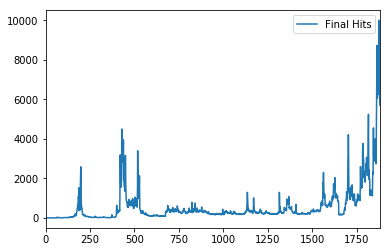

In [214]:
google_trends.head()
google_trends = google_trends.drop(['Hits','Multiplier'],axis=1)
google_trends['Final Hits']=google_trends['Final Hits']
google_trends.plot()

In [215]:
google_trends.describe()

,Final Hits
count,1884.000000
mean,577.447983
std,998.184716
min,7.000000
25%,170.000000
50%,279.500000
75%,522.000000
max,10000.000000


In [216]:
coin_data=pd.read_csv('coindesk-bpi-USD-close_data-2010-07-17_2017-11-25.csv')
coin_data.head()

,Date,Close Price
0,2010-07-18 00:00:00,0.09
1,2010-07-19 00:00:00,0.08
2,2010-07-20 00:00:00,0.07
3,2010-07-21 00:00:00,0.08
4,2010-07-22 00:00:00,0.05


In [217]:
value = ['2012-09-25 00:00:00']
coin_data[coin_data.Date.isin(value)]

,Date,Close Price
800,2012-09-25 00:00:00,12.2


In [218]:
value = ['2017-11-21 00:00:00']
coin_data[coin_data.Date.isin(value)]

,Date,Close Price
2683,2017-11-21 00:00:00,8095.59


In [219]:
coin_data=coin_data.loc[800:2683,'Date':'Close']
coin_data.reset_index(inplace=True)
coin_data.drop(['index'],axis=1,inplace=True)
coin_data.head()

,Date,Close Price
0,2012-09-25 00:00:00,12.20
1,2012-09-26 00:00:00,12.27
2,2012-09-27 00:00:00,12.31
3,2012-09-28 00:00:00,12.39
4,2012-09-29 00:00:00,12.36


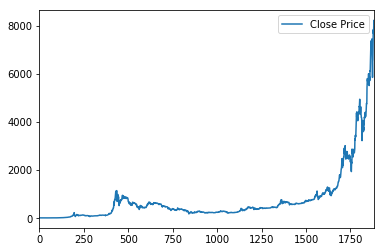

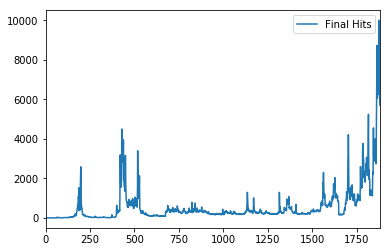

In [220]:
coin_data.plot()
google_trends.plot()

In [221]:
coin_data

,Date,Close Price
0,2012-09-25 00:00:00,12.20
1,2012-09-26 00:00:00,12.27
2,2012-09-27 00:00:00,12.31
3,2012-09-28 00:00:00,12.39
4,2012-09-29 00:00:00,12.36
5,2012-09-30 00:00:00,12.40
6,2012-10-01 00:00:00,12.40
7,2012-10-02 00:00:00,12.84
8,2012-10-03 00:00:00,12.89
9,2012-10-04 00:00:00,12.85


In [222]:
google_trends

,Date,Final Hits
0,2012-09-25,9
1,2012-09-26,9
2,2012-09-27,10
3,2012-09-28,9
4,2012-09-29,9
5,2012-09-30,9
6,2012-10-01,11
7,2012-10-02,11
8,2012-10-03,11
9,2012-10-04,8


In [223]:
match = pd.DataFrame(coin_data['Close Price'])
match

,Close Price
0,12.20
1,12.27
2,12.31
3,12.39
4,12.36
5,12.40
6,12.40
7,12.84
8,12.89
9,12.85


In [224]:
match.rename(columns={'Close Price': 'bitcoin'}, inplace=True)
match['gtrends hits'] = google_trends['Final Hits']
match.head()

,bitcoin,gtrends hits
0,12.20,9
1,12.27,9
2,12.31,10
3,12.39,9
4,12.36,9


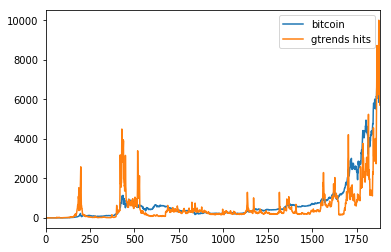

In [225]:
match.plot()

In [226]:
match.corr()

,bitcoin,gtrends hits
bitcoin,1.000000,0.838595
gtrends hits,0.838595,1.000000
